## Preprocess data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [ ]:
#Пожалуйста, выполните код ниже, дабы скачать в коллаб нужные файлы.
#Если вы не в коллабе, выполнять код не нужно


In [312]:
!pwd

/home/vika/embedding_vs_bert


In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/vika/embedding_vs_bert/data/review_books.tsv', sep='\t') 

In [15]:
pos = df[df['score'] == 1]
neg = df[df['score'] == 0]

In [16]:
print (len(pos), len(neg), len(df))

78994 21008 100002


In [17]:
pos = pos[:21000]

In [49]:
pos_train = pos[:20000].dropna()
pos_test = pos[21000:].dropna()
neg_train = neg[:20000].dropna()
neg_test = neg[21000:].dropna()

train = pd.concat([pos_train, neg_train])
train = train.reindex(np.random.permutation(train.index))
test = pd.concat([pos_test, neg_test])
test = test.reindex(np.random.permutation(test.index))

In [50]:
train.head()

,Unnamed: 0,reviewText,score
15978,0,Take a person who prides herself on having sex...,0
3036,0,I always had a vague idea as to what the Klond...,1
66996,0,I just couldn't do it. We bought this book bas...,0
17660,0,There I was. Probably the only one in the movi...,1
13762,0,"As a lord of the rings fan, I find this audio ...",0


In [51]:
train_text = train['reviewText'].values
train_label = train['score'].values

In [35]:
train_text[3:5]

array(['At 23 life can be difficult for anyone, but for Jacob Jankowski, a veterinary student at Cornell, difficult is a bit of an understatement. Not only has he just tragically lost both of his parents, but thanks to the bank he is now broke, and homeless. Unclear as to what to do next Jacob starts walking, unfortunately a few hours later he realizes he is lost and his feet are covered in blisters. In short... he\'s no better off than when he started, but... all of that is about to change when he hears a train is coming his way.  With no clue as to where he is, or where to go next, Jacob makes a decision; hop the train and see where it takes him, little did he know that that would be the circus. Finding himself knee deep in the Benzini Brother\'s most spectacular show on Earth; Jacob quickly discovers that his "previous" life may (in fact) do him justice in his "new" one, and takes on a job as the circus\' official veterinarian. With animals however, comes their performers and that\'

In [53]:
for x in train_text:
    try:
        a = len(x)
    except:
        print (x)

In [98]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

In [99]:
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

In [100]:
tokenizer1.vocab['mississippi']

5900

In [74]:
text = "After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van."
text = '[CLS]' + text + '[SEP]'
tokenized_text = tokenizer.tokenize(text)
print (tokenized_text)

['[', 'cl', '##s', ']', 'after', 'stealing', 'em', '##bed', '##ding', '##s', 'from', 'the', 'bank', "'", 's', 'accounts', ',', 'the', 'bank', 'robber', 'was', 'seen', 'driving', 'on', 'the', 'mississippi', 'river', 'bank', 'in', 'mini', '-', 'van', '.', '[', 'sep', ']']


In [68]:
! wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt

--2019-10-17 15:35:09--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.203
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.203|:443... ^C


In [69]:
!pwd

/home/vika/embedding_vs_bert


In [311]:
%load_ext autoreload
%autoreload 2
import tokenizer_custom_bert

text = "After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van."
text = '[CLS]' + text + '[SEP]'
tokenizer = tokenizer_custom_bert.BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_text = tokenizer.tokenize(text)
print (tokenized_text)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading vocabulary file bert-base-uncased-vocab.txt
resolved voc file bert-base-uncased-vocab.txt
['[UNK]', 'stealing', 'em', '##bed', '##ding', '##s', 'from', 'the', 'bank', "##'", '##s', 'accounts', '##,', 'the', 'bank', 'robber', 'was', 'seen', 'driving', 'on', 'the', '[UNK]', 'river', 'bank', 'in', '[UNK]']


In [103]:
tokenizer.vocab['[UNK]']

100

In [ ]:
! wget

In [ ]:
## Note можно заметить, что до ~1500 в словаре идут unused 

In [63]:
list(tokenizer.vocab.keys())[500:520]

['[unused495]',
 '[unused496]',
 '[unused497]',
 '[unused498]',
 '[unused499]',
 '[unused500]',
 '[unused501]',
 '[unused502]',
 '[unused503]',
 '[unused504]',
 '[unused505]',
 '[unused506]',
 '[unused507]',
 '[unused508]',
 '[unused509]',
 '[unused510]',
 '[unused511]',
 '[unused512]',
 '[unused513]',
 '[unused514]']

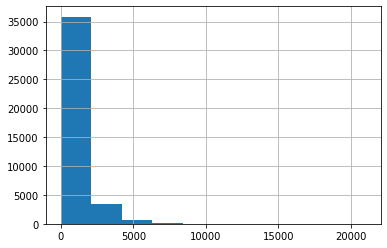

count    39996.000000
mean       928.194019
std       1091.717758
min          3.000000
25%        244.000000
50%        555.000000
75%       1192.000000
max      20986.000000
dtype: float64

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in train_text]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()


In [ ]:
#Загрузка модели
Изначальная модель сохранена в tf, причем сохранена очень криво

In [82]:
import tensorflow as tf
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./PretrainedBert/uncased_L-12_H-768_A-12/bert_model.ckpt.meta')
    saver.restore(sess, "./PretrainedBert/uncased_L-12_H-768_A-12/bert_model.ckpt")

INFO:tensorflow:Restoring parameters from ./PretrainedBert/uncased_L-12_H-768_A-12/bert_model.ckpt


In [85]:
path_to_pretrained = "./PretrainedBert/uncased_L-12_H-768_A-12"
bert_model = BertModel.from_pretrained(path_to_pretrained)

In [90]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens_tensor = torch.tensor([indexed_tokens])
segment_ids = torch.tensor(np.zeros(tokens_tensor.shape)).to(torch.int64)


In [91]:
encoded_layers, _ = bert_model(tokens_tensor, segment_ids)

In [92]:
len(encoded_layers)

12

In [93]:
encoded_layers[2].shape

torch.Size([1, 36, 768])

In [95]:
tokens_tensor.shape

torch.Size([1, 36])

## NN

## Embedding layer

In [221]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def batch_to_ids(batch):
    batch = [text[:500] for text in batch]
    batch = ["[CLS] " + text + " [SEP]" for text in batch]
    tokenized_texts = [tokenizer.tokenize(sent) for sent in batch]
    MAX_LEN = np.max(np.array([len(seq) for seq in tokenized_texts]))
    MAX_LEN_IN_BATCH = np.max(np.array([len(seq) for seq in batch]))

    #print ("word_indexes, max len, max len in batch", MAX_LEN, MAX_LEN_IN_BATCH)
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts], maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    tokens_tensor = torch.tensor(input_ids)
    segments_tensor = torch.tensor(np.zeros(input_ids.shape)).to(torch.int64)

    return tokens_tensor, segments_tensor
    

In [222]:
batch_to_ids(["After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van.", 'Just the place for a Snark! the Bellman cried,As he landed his crew with care'])

(tensor([[  101,   100, 11065,  7861,  8270,  4667,  2015,  2013,  1996,  2924,
          29618,  2015,  6115, 29623,  1996,  2924, 27307,  2001,  2464,  4439,
           2006,  1996,   100,  2314,  2924,  1999,  7163, 29624,  6212, 29625,
            102],
         [  101,   100,  1996,  2173,  2005,  1037,   100,  1996,   100,   100,
           2002,  5565,  2010,  3626,  2007,  2729,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0]]),
 tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0]]))

In [223]:

import torch.nn as nn
import torch
class BertEmbedding(nn.Module):
    """Abstract base class for all type of layers."""
    def __init__(self, gpu):
        super(BertEmbedding, self).__init__()
        self.gpu = gpu
        
    def forward(self, word_sequences):
        tokens_tensor, segments_tensor = batch_to_ids(word_sequences)
        tokens_tensor = self.to_gpu(tokens_tensor)
        segments_tensor = self.to_gpu(segments_tensor)

               
        #print ("forward: token_tensor shape", tokens_tensor.shape)
        #print ("forward: number_word_in_seq shape", number_word_in_seq.shape)
        encoded_layers, _ = bert_model(tokens_tensor, segments_tensor)
        
        batch_embeddings = []
        for batch_i in range(tokens_tensor.shape[0]): #batch_size
            token_embeddings = []
            for token_i in range(tokens_tensor.shape[1]):  #number of token in batch element
                hidden_layers = [] 
                for layer_i in range(len(encoded_layers)):
                    vec = encoded_layers[layer_i][batch_i][token_i]
                    hidden_layers.append(vec)
                token_embeddings.append(hidden_layers)
            summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings]
            summed_last_4_layers = torch.stack(summed_last_4_layers)
            batch_embeddings.append(summed_last_4_layers)
        
        answer = torch.stack(batch_embeddings)  
        return answer
        

    def to_gpu(self, tensor):
        if self.gpu > -1:
            return tensor.cuda(device=self.gpu)
        else:
            return tensor.cpu()


In [232]:
custom_embeddings = BertEmbedding(-1)
embeds_out =custom_embeddings(["After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van.", 'Just the place for a Snark! the Bellman cried,As he landed his crew with care'])


In [234]:
embeds_out.shape

torch.Size([2, 31, 768])

In [233]:
hidden=None
lstm = nn.LSTM(input_size=768, hidden_size=256, num_layers=1, batch_first=True)
lstm_out, h = lstm(embeds_out, hidden)
print ('LSTM layer output shape', lstm_out.shape)
print ('LSTM layer output ', lstm_out)

LSTM layer output shape torch.Size([2, 31, 256])
LSTM layer output  tensor([[[ 1.2403e-02, -2.1831e-01,  2.1863e-02,  ..., -1.0688e-02,
          -1.9930e-02,  1.3350e-01],
         [-1.2861e-03, -2.6605e-02, -3.4227e-01,  ..., -3.4917e-02,
          -2.5498e-01,  4.8522e-01],
         [ 1.4371e-02, -5.0095e-03, -5.6394e-01,  ..., -8.4949e-02,
          -9.7448e-03,  1.6931e-02],
         ...,
         [-4.5546e-03, -3.1821e-01,  7.6104e-02,  ...,  6.8097e-02,
           4.7009e-03, -1.6586e-01],
         [-1.5355e-02, -5.8197e-01, -6.3129e-02,  ..., -8.2794e-02,
          -3.3687e-02,  5.1642e-02],
         [-3.0231e-01, -2.2184e-01,  1.0633e-02,  ..., -1.5395e-01,
           1.3210e-01,  7.8849e-02]],

        [[ 2.7731e-02, -1.8341e-01,  3.9500e-01,  ..., -1.1194e-01,
          -1.7266e-02,  2.9907e-01],
         [ 3.8574e-04, -2.3737e-02, -6.6040e-02,  ..., -6.7338e-03,
          -8.7242e-03,  4.2282e-01],
         [-2.2248e-04,  4.7318e-02, -7.2799e-01,  ...,  1.0580e-01,
        

In [300]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
class LSTMClassifier(nn.Module):

    def __init__(self, hidden_dim, output_size, batch_size, cuda):

        super(LSTMClassifier, self).__init__()
        self.gpu = cuda
        self.embedding_dim = 768
        self.hidden_dim = hidden_dim

        self.embedding = BertEmbedding(self.gpu)
        self.lstm = nn.LSTM(input_size=self.embedding_dim, hidden_size=hidden_dim, bidirectional=True, num_layers=1, batch_first=True)
        self.hidden2label = nn.Linear(hidden_dim, output_size)
        self.hidden = self.init_hidden(batch_size)

    def init_hidden(self, batch_size):
        # first is the hidden h
        # second is the cell c
        if self.gpu > -1:
            return (Variable(torch.zeros(2, batch_size, self.hidden_dim).cuda()),
                    Variable(torch.zeros(2, batch_size, self.hidden_dim).cuda()))
        else:
            return (Variable(torch.zeros(2, batch_size, self.hidden_dim)),
                    Variable(torch.zeros(2, batch_size, self.hidden_dim)))

    def forward(self, sentence):
        x = self.embedding(sentence)
        lstm_out, (ht, ct) = self.lstm(x, self.hidden)
        y = self.hidden2label(ht[-1])
        log_probs = F.log_softmax(y, dim=1)
        return log_probs

In [301]:
#cuda0 = torch.device('cuda:0')

In [302]:
#model.to(device=cuda0)

In [303]:
output_size = 2
hidden_dim = 256
batch_size = 20

model = LSTMClassifier(hidden_dim, output_size, 20, cuda = -1)

In [304]:
pred = model(train_text[7:27])

In [305]:
pred.shape

torch.Size([20, 2])

In [306]:
embeds_out.shape

torch.Size([20, 117, 768])

In [307]:
embeds_out =custom_embeddings(train_text[4:7])
print ('Embedding layer output shape', embeds_out.shape)
print ('Embedding layer output ', embeds_out)

Embedding layer output shape torch.Size([3, 83, 768])
Embedding layer output  tensor([[[-4.4146e-01, -3.1786e+00, -1.6374e-01,  ..., -3.7876e-01,
           5.9078e-01,  7.4074e-01],
         [-1.5193e-01,  4.2343e+00,  5.2023e-01,  ...,  1.0053e+00,
           6.3401e-01,  1.3098e+00],
         [ 2.1064e+00,  2.4128e+00,  1.3109e+00,  ..., -4.1954e-02,
          -1.5611e-02,  1.1473e+00],
         ...,
         [-2.9670e+00, -1.0039e+00,  2.8182e+00,  ..., -1.3264e+00,
          -2.7967e+00, -2.0073e+00],
         [-1.1177e+00, -3.6020e+00, -9.1324e-01,  ...,  1.1221e+00,
           2.5948e-01,  5.7704e-01],
         [ 9.9009e-01,  4.8730e-01, -1.0148e-01,  ...,  2.9960e-01,
          -2.4175e-01,  1.9994e-02]],

        [[-3.0533e-01, -1.0331e-01,  3.3248e+00,  ..., -8.8722e-01,
           1.4878e-01, -2.6120e+00],
         [-7.5062e-03,  1.9412e+00,  4.8105e+00,  ...,  1.8072e+00,
          -1.8479e+00,  1.2648e+00],
         [-1.7691e+00,  1.8795e+00,  8.8901e-01,  ..., -6.1095e-01

In [239]:
batch_size

20

In [153]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [308]:
it = 0
tot = 0
act = 0

PRINT_EVERY = 10

from tqdm import tqdm
loss_function = nn.NLLLoss()
for i in range(len(train_label)//batch_size):
    idx = [i*batch_size + k for k in range(batch_size)]
    batch = train_text[idx]
    y = train_label[idx]
    y = torch.from_numpy(np.array((y)))

    optimizer.zero_grad()
    pred = model(batch)
    print (pred.shape)
    l = loss_function(pred, y)
    l.backward()
    optimizer.step()

    it += 1
    tot += l.item()
    act += (pred.detach().numpy().argmax() == y)
    if it == PRINT_EVERY:
        print(tot/it, act/it)
        it = 0
        tot = 0
        act = 0

torch.Size([20, 2])
torch.Size([20, 2])
torch.Size([20, 2])


KeyboardInterrupt: 